In [28]:
#Collaborative Based Prediction

import numpy as np
import pandas as pd

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u', sep='\t', names=column_names)

In [29]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949.0
1,186,302,3,891717742.0
2,22,377,1,878887116.0
3,244,51,2,880606923.0
4,166,346,1,886397596.0


In [30]:
movie_titles = pd.read_csv("Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [31]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3357 entries, 0 to 3356
Data columns (total 5 columns):
user_id      3357 non-null int64
item_id      3357 non-null int64
rating       3357 non-null int64
timestamp    3356 non-null float64
title        3357 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 157.4+ KB


In [32]:

indexNames = df[ df['title'] == "Liar Liar (1997)" ].index
print(sum(indexNames))
print(indexNames)

8430
Int64Index([555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567,
            568, 569],
           dtype='int64')


In [33]:
df.groupby('item_id')['user_id'].count().sort_values(ascending=False).head()

item_id
258    22
121    20
98     19
50     19
117    18
Name: user_id, dtype: int64

In [34]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Contact (1997)                      22
Independence Day (ID4) (1996)       20
Silence of the Lambs, The (1991)    19
Star Wars (1977)                    19
Raiders of the Lost Ark (1981)      18
Name: rating, dtype: int64

In [35]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
unknown                    5.0
Primary Colors (1998)      5.0
Jungle Book, The (1994)    5.0
Laura (1944)               5.0
To Die For (1995)          5.0
Name: rating, dtype: float64

In [36]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
101 Dalmatians (1996),2.00
12 Angry Men (1957),4.25
187 (1997),3.00
2 Days in the Valley (1996),3.50
"20,000 Leagues Under the Sea (1954)",3.50


In [37]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()


,rating,num of ratings
title,,
101 Dalmatians (1996),2.00,1
12 Angry Men (1957),4.25,4
187 (1997),3.00,1
2 Days in the Valley (1996),3.50,2
"20,000 Leagues Under the Sea (1954)",3.50,2


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

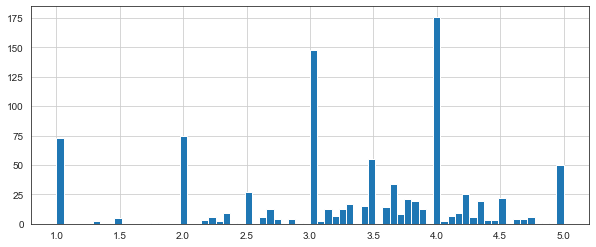

In [39]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

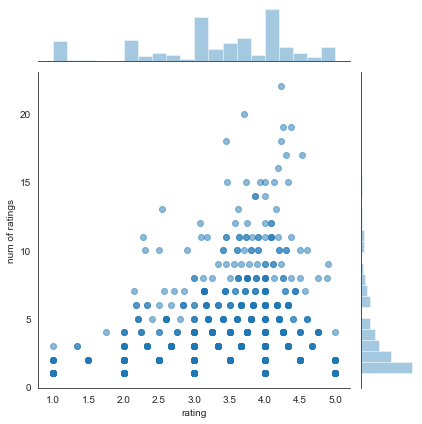

In [40]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.



In [41]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),...,"Wizard of Oz, The (1939)",Wolf (1994),Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Most rated movie:

ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Contact (1997),4.227273,22
Independence Day (ID4) (1996),3.700000,20
"Silence of the Lambs, The (1991)",4.263158,19
Star Wars (1977),4.368421,19
Raiders of the Lost Ark (1981),4.222222,18
"Rock, The (1996)",3.444444,18
Return of the Jedi (1983),4.529412,17
Chasing Amy (1997),4.294118,17
"Empire Strikes Back, The (1980)",4.187500,16


In [43]:
ratings.head()

,rating,num of ratings
title,,
101 Dalmatians (1996),2.00,1
12 Angry Men (1957),4.25,4
187 (1997),3.00,1
2 Days in the Valley (1996),3.50,2
"20,000 Leagues Under the Sea (1954)",3.50,2


Now let's grab the user ratings for those two movies: Contact (1997) & Star Wars (1977)

In [44]:
Contact_user_ratings = moviemat['Contact (1997)']
#starwars_user_ratings = moviemat['Star Wars (1977)']

Contact_user_ratings.head(20)

user_id
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     2.0
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
Name: Contact (1997), dtype: float64

In [45]:
similar_to_contact = moviemat.corrwith(Contact_user_ratings)

In [46]:
corr_contact = pd.DataFrame(similar_to_contact,columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
"Adventures of Priscilla, Queen of the Desert, The (1994)",-1.000000
"African Queen, The (1951)",1.000000
Apocalypse Now (1979),-1.000000
"Birdcage, The (1996)",0.454545
"Birds, The (1963)",-1.000000


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [47]:
corr_contact.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Philadelphia Story, The (1940)",1.0
What's Eating Gilbert Grape (1993),1.0
"African Queen, The (1951)",1.0
Toy Story (1995),1.0
Star Trek: The Motion Picture (1979),1.0
"Sound of Music, The (1965)",1.0
Con Air (1997),1.0
Contact (1997),1.0
Rumble in the Bronx (1995),1.0


Let's fix this by filtering out movies that have less than 10 reviews (this value was chosen based off the histogram from earlier).

In [48]:
corr_contact = corr_contact.join(ratings['num of ratings'])
corr_contact.head()

,Correlation,num of ratings
title,,
"Adventures of Priscilla, Queen of the Desert, The (1994)",-1.000000,6
"African Queen, The (1951)",1.000000,3
Apocalypse Now (1979),-1.000000,7
"Birdcage, The (1996)",0.454545,14
"Birds, The (1963)",-1.000000,5


In [49]:
corr_contact[corr_contact['num of ratings']>10].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Contact (1997),1.000000,22
Toy Story (1995),1.000000,14
"People vs. Larry Flynt, The (1996)",0.981981,13
Fargo (1996),0.944911,15
Twelve Monkeys (1995),0.577350,15


If you have just watched "Contact - 1997", The next recomended movie frow our project would be Toy Story released in 1995, then People vs. Larry Flynt, The (1996), then Fargo (1996),then  Twelve Monkeys (1995)....

Now, repeat the same process for Star wars:::

In [50]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    NaN
2    5.0
3    NaN
4    NaN
5    NaN
Name: Star Wars (1977), dtype: float64

In [51]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)


corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
Back to the Future (1985),-1.0
Chasing Amy (1997),-0.5
"First Wives Club, The (1996)",-1.0
"Godfather: Part II, The (1974)",0.5
Grumpier Old Men (1995),-1.0


In [52]:
corr_starwars.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Star Wars (1977),1.0
Willy Wonka and the Chocolate Factory (1971),1.0
Top Gun (1986),1.0
"Omen, The (1976)",1.0
Star Trek: The Wrath of Khan (1982),1.0


In [53]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
Back to the Future (1985),-1.0,10
Chasing Amy (1997),-0.5,17
"First Wives Club, The (1996)",-1.0,6
"Godfather: Part II, The (1974)",0.5,10
Grumpier Old Men (1995),-1.0,8


In [54]:
corr_starwars[corr_starwars['num of ratings']>10].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,19
Star Trek: The Wrath of Khan (1982),1.000000,11
Willy Wonka and the Chocolate Factory (1971),1.000000,13
Star Trek: First Contact (1996),0.866025,14
"People vs. Larry Flynt, The (1996)",-0.188982,13


If you have just watched "Star Wars - 1977", The next recomended movie frow our project would be "Star Trek: The Wrath of Khan" released in 1982.